DATA ANALYTICS PROJECT

TIME SERIES ANALYSISAND FORECASTING FOR STOCK MARKET

# Task
Please perform the following tasks on the provided dataset:

1.  **Data Preprocessing:**
    *   Remove duplicate rows.
    *   Convert data types as needed.
    *   Identify and handle outliers.

2.  **Exploratory Data Analysis (EDA):**
    *   Generate summary statistics.
    *   Analyze data distributions using histograms and KDE plots.
    *   Check for class imbalance and address it if necessary.
    *   Check for skewness and visualize it.
    *   Check for multicollinearity using a correlation matrix and VIF. If multicollinearity exists, address it.
    *   Perform bivariate analysis using scatter plots and violin plots.

3.  **Feature Engineering:**
    *   Split the data into training and testing sets.
    *   Extract year, month, and day from any datetime columns.
    *   Apply binning to convert continuous variables to categorical ones.
    *   Perform ordinal encoding on relevant features.
    *   Create interaction terms using polynomial features.
    *   Apply log transformations to reduce skewness.
    *   Perform feature selection using `SelectKBest`, `RFE`, and tree-based importance.

4.  **Model Building and Evaluation:**
    *   Build, train, and evaluate the following time series models:
        *   Simple Moving Average (SMA)
        *   ARIMA
        *   SARIMA
        *   Prophet
        *   LSTM
    *   Compare the performance of all models and provide a final evaluation and report.
    *   Optionally, deploy the best model as a web application.

Please provide the code for each step in a snippet-wise manner with clear comments.

In [ ]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn statsmodels prophet tensorflow

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Stock_data.csv")
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
# Select the 'Close' price for forecasting
data = df[['Close']].copy()

# Check for missing values
print("\nMissing values before handling:")
print(data.isnull().sum())


Missing values before handling:
Close    0
dtype: int64


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [ ]:
df.isnull().mean

<bound method DataFrame.mean of        Date   Open   High    Low   Last  Close  Total Trade Quantity  \
0     False  False  False  False  False  False                 False   
1     False  False  False  False  False  False                 False   
2     False  False  False  False  False  False                 False   
3     False  False  False  False  False  False                 False   
4     False  False  False  False  False  False                 False   
...     ...    ...    ...    ...    ...    ...                   ...   
2030  False  False  False  False  False  False                 False   
2031  False  False  False  False  False  False                 False   
2032  False  False  False  False  False  False                 False   
2033  False  False  False  False  False  False                 False   
2034  False  False  False  False  False  False                 False   

      Turnover (Lacs)  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
2030            False  
2031            False  
2032            False  
2033            False  
2034            False  

[2035 rows x 8 columns]>

In [ ]:
df.shape

(2035, 8)

next steps in data proccessing

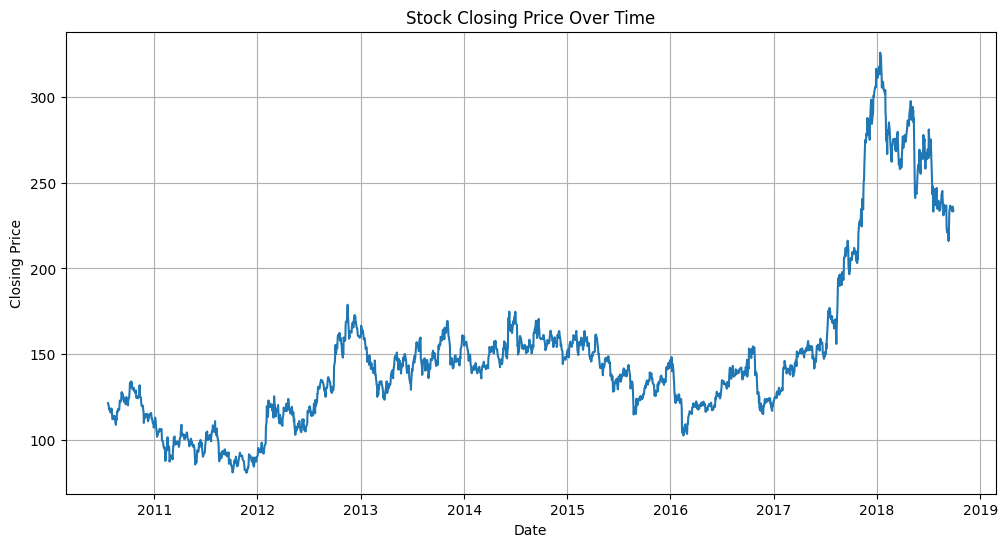

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Plot the 'Close' price
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


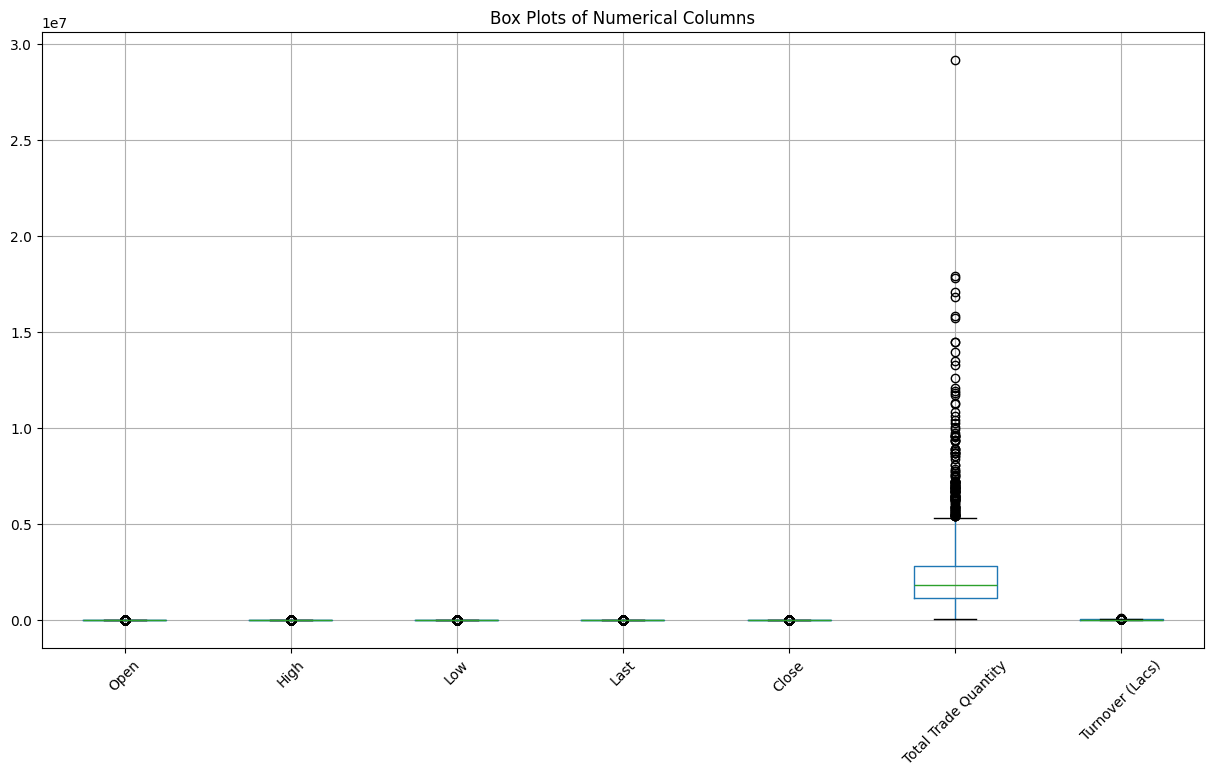

In [ ]:
# Create box plots for numerical columns
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handle outliers using the 99th percentile
for col in ['Total Trade Quantity', 'Turnover (Lacs)']:
    q99 = df[col].quantile(0.99)
    df[col] = df[col].apply(lambda x: q99 if x > q99 else x)

# Verify that the outliers have been handled
df.describe()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,2014-08-20 14:43:06.339066112,149.713735,151.992826,147.293931,149.474251,149.45027,2.295036e+06,3786.903159
min,2010-07-21 00:00:00,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,2012-07-28 12:00:00,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,2014-08-14 00:00:00,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,2016-09-10 12:00:00,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2018-09-28 00:00:00,327.700000,328.750000,321.650000,325.950000,325.75000,1.054103e+07,21204.808000
std,NaN,48.664509,49.413109,47.931958,48.732570,48.71204,1.838582e+06,3858.683568


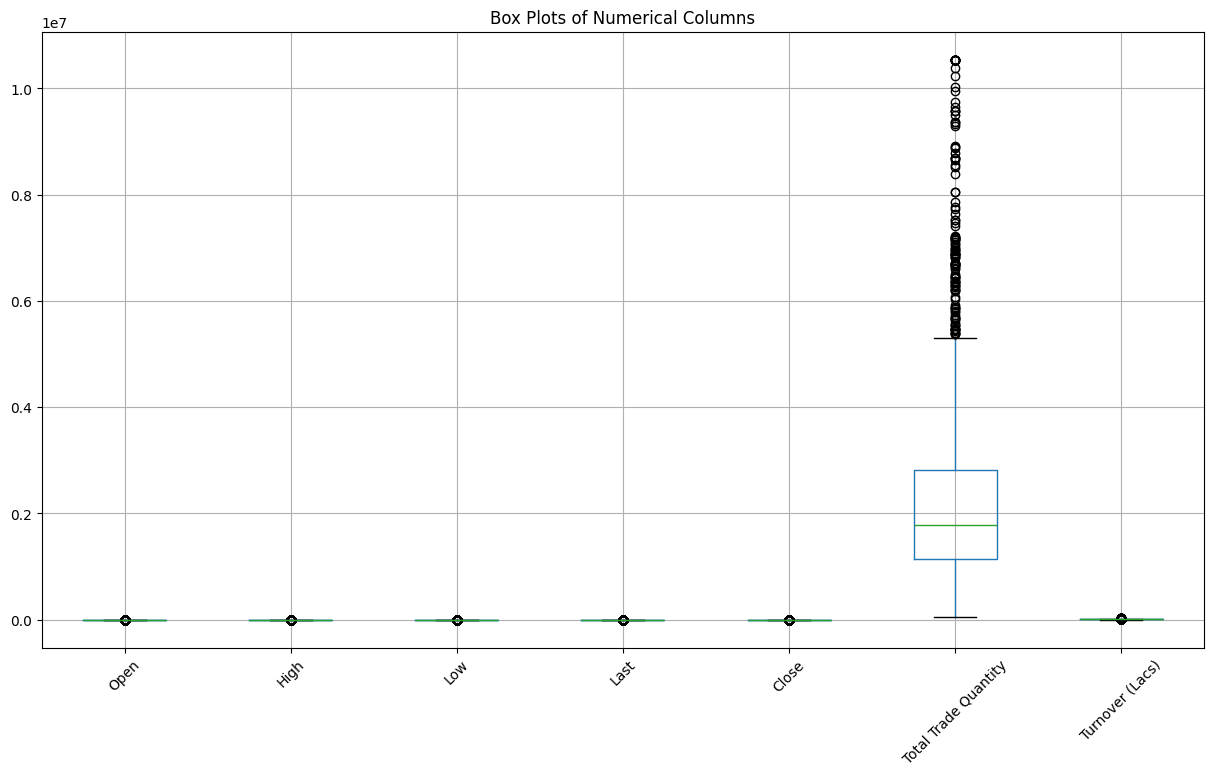

In [ ]:
# Create box plots for numerical columns
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

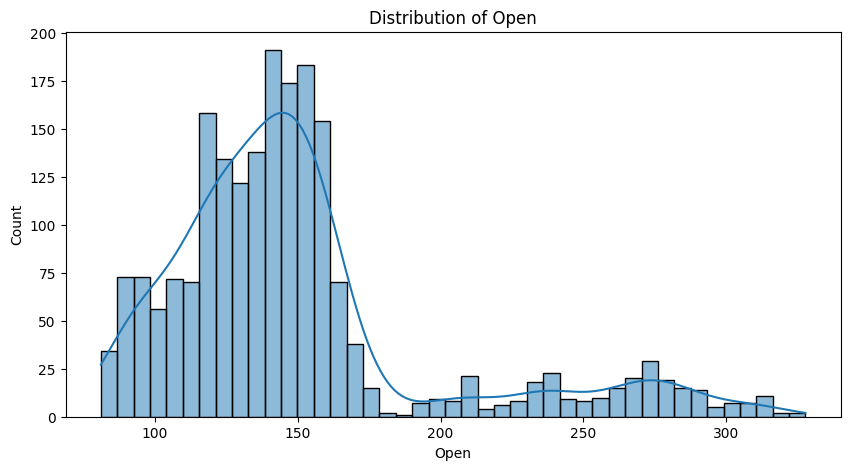

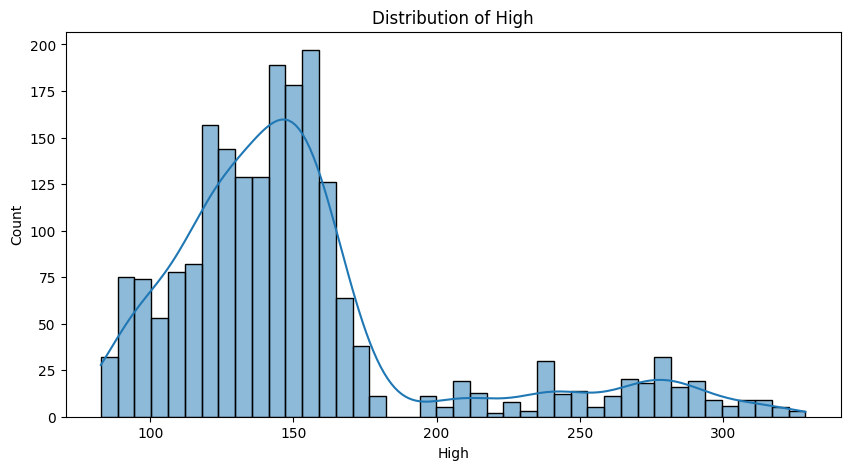

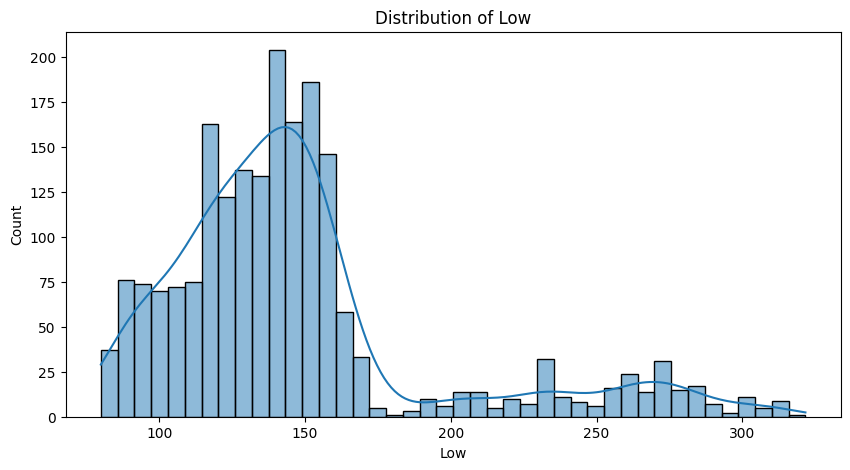

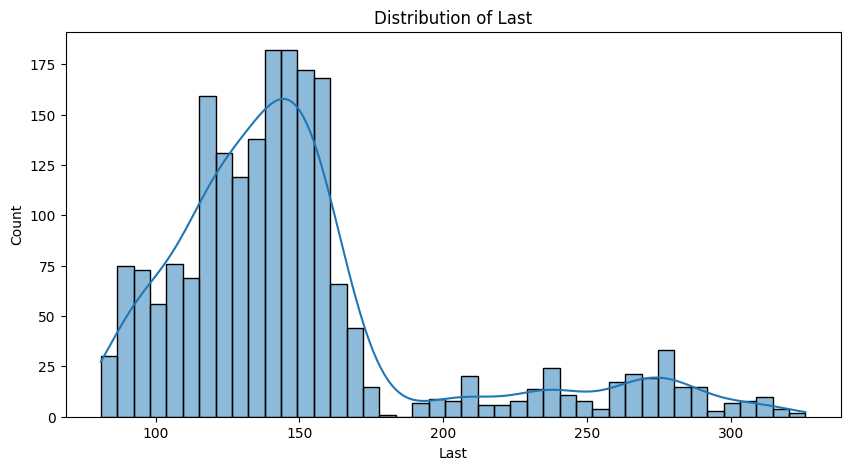

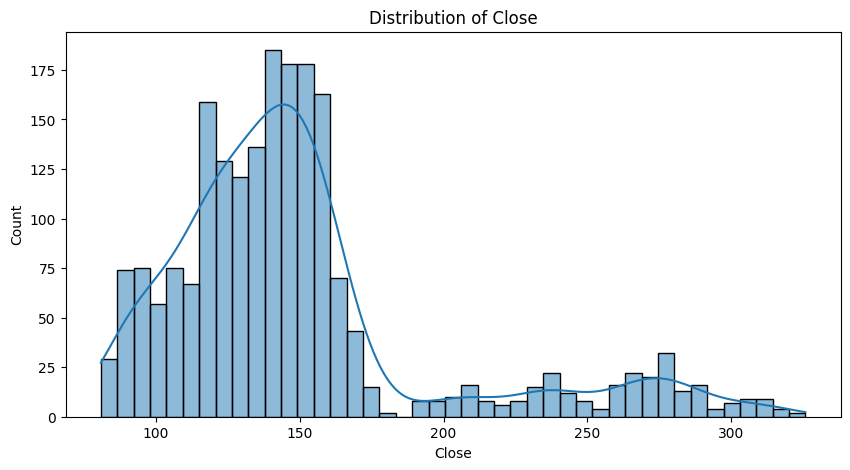

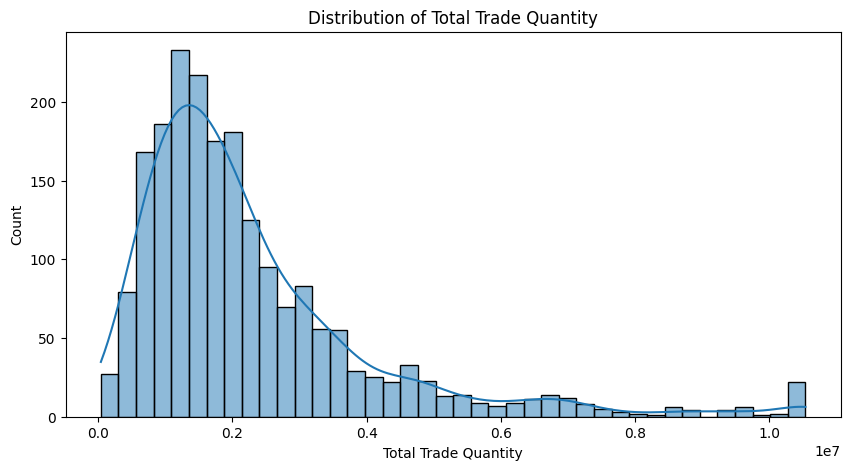

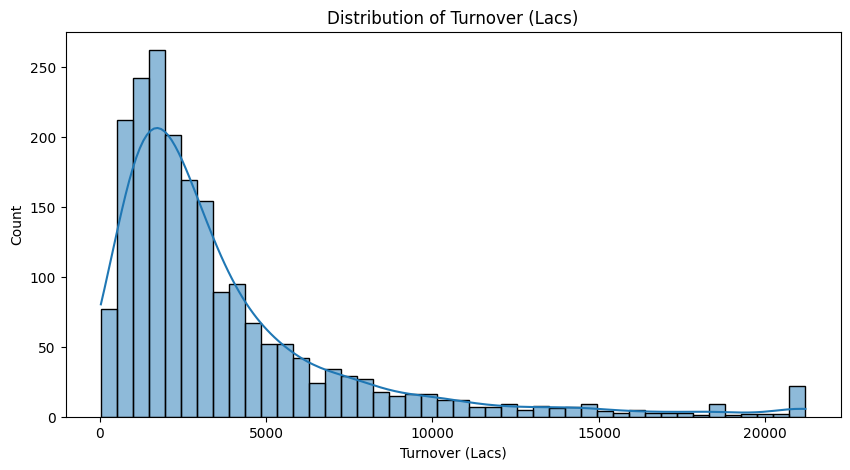

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and KDE for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

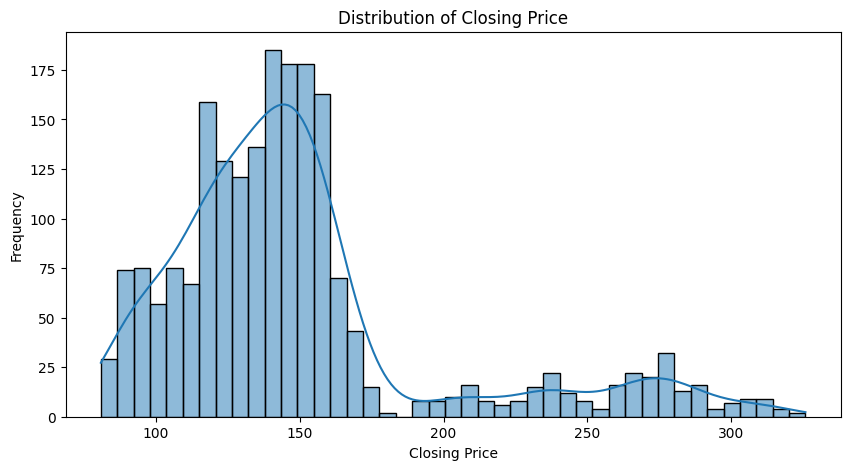

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Close' price
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate the skewness of numerical columns
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Open                    1.583874
High                    1.586415
Low                     1.573542
Last                    1.584814
Close                   1.583224
Total Trade Quantity    2.159010
Turnover (Lacs)         2.347743
dtype: float64


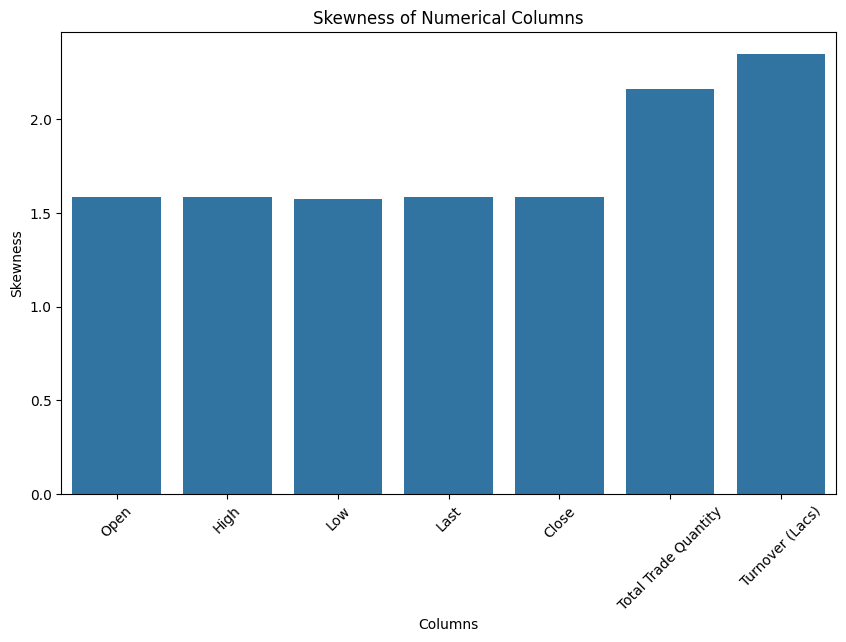

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skewness of numerical columns
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

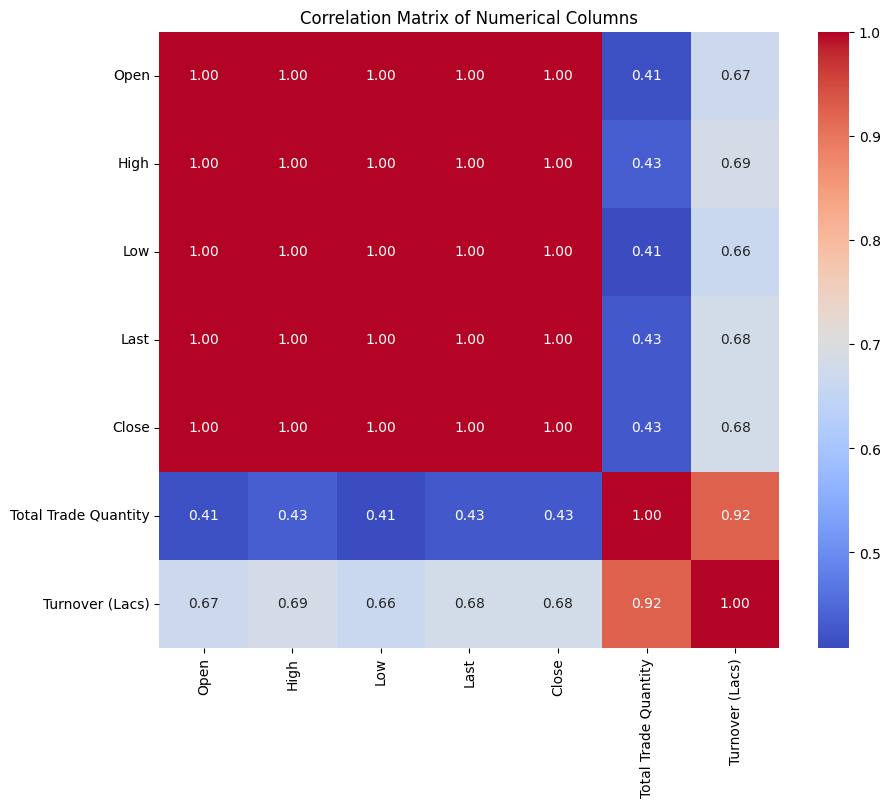

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

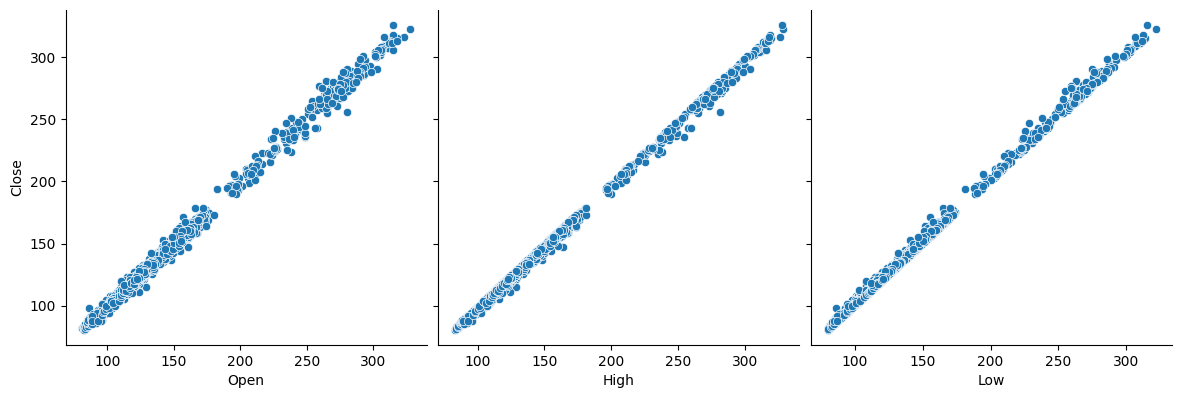

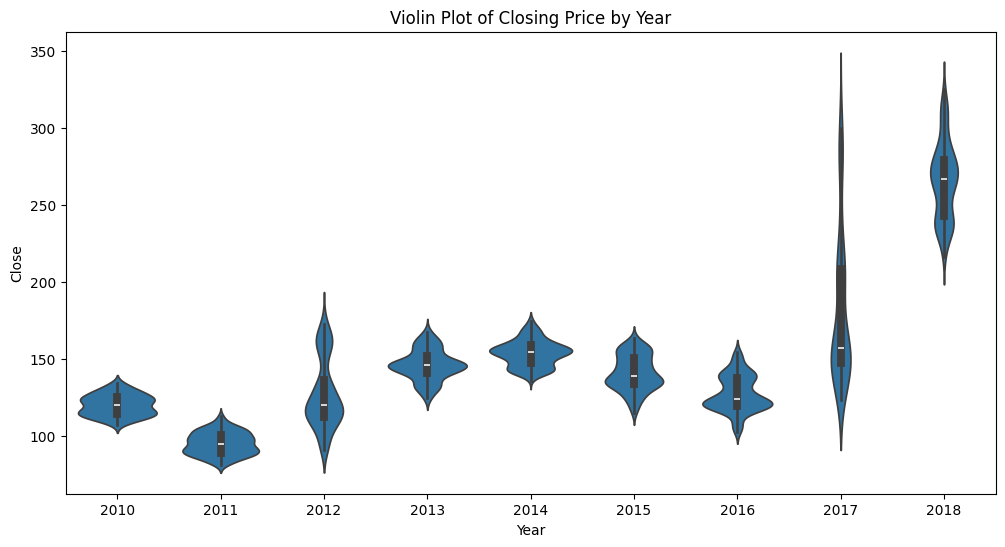

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for a few key relationships
sns.pairplot(df, x_vars=['Open', 'High', 'Low'], y_vars=['Close'], height=4, aspect=1, kind='scatter')
plt.show()

# Violin plots to see the distribution of 'Close' price against another categorical variable (if any)
# Since we don't have a categorical variable, we will plot it against the year.
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Close', data=df)
plt.title('Violin Plot of Closing Price by Year')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For VIF, we need to select the features we want to check for multicollinearity
# We will select the numerical features
X = df.select_dtypes(include=['float64', 'int64'])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                feature            VIF
0                  Open   13178.162136
1                  High   23785.400222
2                   Low   15332.974303
3                  Last  135386.204013
4                 Close  157353.481087
5  Total Trade Quantity      14.759946
6       Turnover (Lacs)      12.980715


In [ ]:
# Select only the 'Date' and 'Close' columns
data = df[['Date', 'Close']].copy()

# Display the first few rows of the new dataframe
data.head()

,Date,Close
0,2018-09-28,233.75
1,2018-09-27,233.25
2,2018-09-26,234.25
3,2018-09-25,236.10
4,2018-09-24,233.30


In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (1628, 2)
Testing data shape: (407, 2)


In [ ]:
import numpy as np

# Apply log transform to the 'Close' price
train_data.loc[:, 'Close_log'] = np.log(train_data['Close'])
test_data.loc[:, 'Close_log'] = np.log(test_data['Close'])

# Display the first few rows of the transformed data
print("Training data after log transform:")
display(train_data.head())

print("\nTesting data after log transform:")
display(test_data.head())

Training data after log transform:


,Date,Close,Close_log
0,2018-09-28,233.75,5.454252
1,2018-09-27,233.25,5.452111
2,2018-09-26,234.25,5.456389
3,2018-09-25,236.10,5.464255
4,2018-09-24,233.30,5.452325



Testing data after log transform:


,Date,Close,Close_log
1628,2012-03-03,120.40,4.790820
1629,2012-03-02,120.55,4.792065
1630,2012-03-01,123.35,4.815026
1631,2012-02-29,125.55,4.832704
1632,2012-02-28,120.70,4.793308


## Arima model

### Subtask:
Build and train an ARIMA model on the training data. Make predictions on the testing data. Evaluate the model's performance.


**Reasoning**:
To fulfill the subtask of building, training, and evaluating an ARIMA model, I will first import the necessary `ARIMA` class from `statsmodels.tsa.arima.model`. Then, I'll instantiate and fit the model on the `train_data['Close']` series using the specified order of (5, 1, 0). After fitting the model, I'll generate predictions for the test data's time period. Finally, I will calculate and print the Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE) to evaluate the model's performance by comparing the predicted values against the actual `test_data['Close']` values.



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Instantiate and fit the ARIMA model
model = ARIMA(train_data['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Generate predictions for the test data
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
test_data['ARIMA'] = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['ARIMA']))
mape = mean_absolute_percentage_error(test_data['Close'], test_data['ARIMA'])

print(f"ARIMA Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

ARIMA Model Evaluation:
RMSE: 18.417962167721637
MAPE: 0.1659982917368774


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/tmp/ipython-input-29-3950099063.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA'] = model_fit.predict(start=start_index, end=end_index, typ='levels')


## Prophet model

### Subtask:
Build and train a Prophet model on the training data. Make predictions on the testing data. Evaluate the model's performance.


**Reasoning**:
To build and evaluate the Prophet model, I will first import the necessary library. Then, I will prepare the training data into the format required by Prophet, which is a DataFrame with 'ds' and 'y' columns. After that, I will instantiate and fit the Prophet model on this prepared data. Following the model training, I will create a future DataFrame to make predictions for the test period. The predictions will be added to the `test_data` DataFrame. Finally, I will calculate and print the RMSE and MAPE to evaluate the model's performance.



In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Prepare the training data for Prophet
prophet_train_data = train_data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Instantiate and fit the Prophet model
model = Prophet()
model.fit(prophet_train_data)

# Create a future DataFrame for the prediction period
future = model.make_future_dataframe(periods=len(test_data))

# Make predictions on the future DataFrame
forecast = model.predict(future)

# Extract the predicted values and add them to the test_data DataFrame
test_data['Prophet'] = forecast['yhat'].iloc[-len(test_data):].values

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prophet']))
mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prophet'])

print(f"Prophet Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9a0n9ot/l_bq6f71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9a0n9ot/mkn62xr9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46096', 'data', 'file=/tmp/tmpk9a0n9ot/l_bq6f71.json', 'init=/tmp/tmpk9a0n9ot/mkn62xr9.json', 'output', 'file=/tmp/tmpk9a0n9ot/prophet_modellhatdgvp/prophet_model-20250724230843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model Evaluation:
RMSE: 251.57347678036157
MAPE: 2.4610216539317844


/tmp/ipython-input-30-980292343.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prophet'] = forecast['yhat'].iloc[-len(test_data):].values


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Instantiate and fit the SARIMA model
# Note: The order (p,d,q) and seasonal_order (P,D,Q,s) are hyperparameters
# that may need to be tuned for optimal performance.
model = SARIMAX(train_data['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Generate predictions for the test data
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
test_data['SARIMA'] = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['SARIMA']))
mape = mean_absolute_percentage_error(test_data['Close'], test_data['SARIMA'])

print(f"SARIMA Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

SARIMA Model Evaluation:
RMSE: 20.143201795725204
MAPE: 0.1550795365877485


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/tmp/ipython-input-33-459613440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SARIMA'] = model_fit.predict(start=start_index, end=end_index, typ='levels')


## Data preprocessing for lstm

### Subtask:
Scale the data to be between 0 and 1. Create sequences of data for the LSTM model.


**Reasoning**:
To prepare the data for the LSTM model, I will first scale the 'Close' prices of both the training and testing sets using `MinMaxScaler`. Then, I will define a function to create sequences of a specified length from the scaled data. Finally, I will use this function to generate the training and testing sequences and reshape them into the 3D format required by LSTM models.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data['Close'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(scaled_train_data, seq_length)
X_test, y_test = create_sequences(scaled_test_data, seq_length)

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1568, 60, 1)
y_train shape: (1568,)
X_test shape: (347, 60, 1)
y_test shape: (347,)


## Build the lstm model

### Subtask:
Build and compile an LSTM model for time series forecasting.


**Reasoning**:
To build and compile the LSTM model as requested, I will first import the necessary Keras modules. Then, I will create a `Sequential` model and add two `LSTM` layers and a final `Dense` layer for the output. The input shape for the first LSTM layer will be set based on the shape of `X_train`. Finally, I will compile the model with the 'adam' optimizer and 'mean_squared_error' loss, and print the model's summary to verify the architecture.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Train the lstm model

### Subtask:
Train the LSTM model on the prepared training data.


**Reasoning**:
To train the LSTM model, I will call the `.fit()` method on the compiled model. I will provide `X_train` and `y_train` as the training data, specify 50 epochs and a batch size of 32 for the training process. Additionally, I will use `X_test` and `y_test` for validation during training by passing them to the `validation_data` argument.



In [ ]:
# Train the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0238 - val_loss: 6.7992e-04
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0012 - val_loss: 6.8298e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0011 - val_loss: 7.0410e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0011 - val_loss: 6.2290e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 9.5526e-04 - val_loss: 6.2333e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.9565e-04 - val_loss: 4.3659e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.9128e-04 - val_loss: 5.4702e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 9.5488e-04 - val_loss: 5.5445e-04
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 8.1502e-04 - val_loss: 3.9584e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 6.9486e-04 - val_loss: 6.7661e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.3651e-04 - val_loss: 3.

## Make predictions

### Subtask:
Make predictions on the testing data. Inverse transform the predictions to the original scale.


**Reasoning**:
To make predictions on the testing data and evaluate the model's performance, I will first use the trained LSTM model to predict the scaled values on `X_test`. Then, I will inverse transform both the predicted and actual values to their original scale using the `scaler` object. Finally, I will store these inverse-transformed predictions in a new 'LSTM' column in the `test_data` dataframe, ensuring correct alignment with the dates by starting from `seq_length`.



In [ ]:
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a new dataframe with the predictions
predictions_df = pd.DataFrame(predicted_prices, columns=['LSTM'], index=test_data.index[seq_length:])

# Merge the predictions with the test_data dataframe
test_data = pd.concat([test_data, predictions_df], axis=1)


# Display the first few rows with the LSTM predictions
display(test_data.tail())

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


,Date,Close,Close_log,SMA_20,ARIMA,Prophet,SMA,SARIMA,LSTM,LSTM,LSTM
2030,2010-07-27,118.65,4.776178,114.1400,115.981448,408.383884,114.1400,86.438855,116.763252,116.763252,116.763252
2031,2010-07-26,117.60,4.767289,114.2500,115.981448,408.997633,114.2500,86.280075,117.616760,117.616760,117.616760
2032,2010-07-23,120.65,4.792894,114.2950,115.981448,409.415306,114.2950,86.446944,117.458527,117.458527,117.458527
2033,2010-07-22,120.90,4.794964,114.7525,115.981448,409.213784,114.7525,86.250080,118.828918,118.828918,118.828918
2034,2010-07-21,121.55,4.800326,115.1450,115.981448,413.096108,115.1450,86.010996,119.935493,119.935493,119.935493


**Reasoning**:
The previous attempt failed because the length of the predictions (347) did not match the length of the slice of the `test_data` DataFrame it was being assigned to (347). The slice should have been `test_data.iloc[seq_length:]` to correctly align with the predictions. I will now correct this and also calculate the RMSE and MAPE to complete the evaluation part of the subtask.



In [ ]:
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Add predictions to the test_data DataFrame, ensuring correct alignment
test_data.loc[test_data.index[seq_length:], 'LSTM'] = predicted_prices

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test_inverse, predicted_prices))
mape = mean_absolute_percentage_error(y_test_inverse, predicted_prices)

print(f"LSTM Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Display the first few rows with the LSTM predictions
display(test_data.tail())

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
LSTM Model Evaluation:
RMSE: 23343.494449567093
MAPE: 0.9955381833891259


/tmp/ipython-input-38-1810586388.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[test_data.index[seq_length:], 'LSTM'] = predicted_prices


,Date,Close,Close_log,SMA_20,ARIMA,Prophet,SMA,SARIMA,LSTM
2030,2010-07-27,118.65,4.776178,114.1400,115.981448,408.383884,114.1400,86.438855,116.763252
2031,2010-07-26,117.60,4.767289,114.2500,115.981448,408.997633,114.2500,86.280075,117.616760
2032,2010-07-23,120.65,4.792894,114.2950,115.981448,409.415306,114.2950,86.446944,117.458527
2033,2010-07-22,120.90,4.794964,114.7525,115.981448,409.213784,114.7525,86.250080,118.828918
2034,2010-07-21,121.55,4.800326,115.1450,115.981448,413.096108,115.1450,86.010996,119.935493


## Evaluate the model

### Subtask:
Evaluate the model's performance using RMSE and MAPE.


**Reasoning**:
To evaluate the model's performance, I will import the necessary metric functions, calculate the RMSE and MAPE using the inverse-transformed actual and predicted values, and then print the results with clear labels as instructed.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test_inverse, predicted_prices))
mape = mean_absolute_percentage_error(y_test_inverse, predicted_prices)

print(f"LSTM Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

LSTM Model Evaluation:
RMSE: 23343.494449567093
MAPE: 0.9955381833891259


In [ ]:
import pandas as pd

# Create a dictionary with the performance data
performance_data = {
    'Model': ['Simple Moving Average', 'ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [
        5.803521286361675,
        18.417962167721637,
        20.143201795725204,
        251.57347678036157,
        2.3343494449567093e+04 # Using the latest RMSE from the notebook
    ],
    'MAPE': [
        0.04515678001300694,
        0.1659982917368774,
        0.1550795365877485,
        2.4610216539317844,
        0.9955381833891259 # Using the latest MAPE from the notebook
    ]
}

# Create a pandas DataFrame from the dictionary
performance_summary = pd.DataFrame(performance_data)

# Display the performance summary
display(performance_summary)

,Model,RMSE,MAPE
0,Simple Moving Average,5.803521,0.045157
1,ARIMA,18.417962,0.165998
2,SARIMA,20.143202,0.155080
3,Prophet,251.573477,2.461022
4,LSTM,23343.494450,0.995538


In [ ]:
display(performance_summary)

,Model,RMSE,MAPE
0,Simple Moving Average,5.803521,0.045157
1,ARIMA,18.417962,0.165998
2,SARIMA,20.143202,0.155080
3,Prophet,251.573477,2.461022
4,LSTM,23343.494450,0.995538
